In [2]:
import pandas as pd
import numpy as np
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import boxcox
warnings.filterwarnings('ignore')

RSEED=42

sns.set_context('talk')
plt.style.use(['dark_background'])
#plt.rcParams['image.cmap'] = "orangered"
plt.rcParams.update({'font.sans-serif':'Helvetica'})

In [5]:
data = pd.read_csv("./data/data_prep_reg.csv", index_col=[0])

In [6]:
data

,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,max_precip,...,var_wind_spd,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press
0,2,45.126304,27.208333,19.275000,22.299527,2.594011,6.728895,21.358333,7.933333,0.000,...,0.155268,0.666250,1.355000,87.871667,87.614167,87.752434,0.070374,0.004952,87.762083,0.257500
1,3,79.131702,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,0.561,...,0.290736,0.744167,2.760833,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333
2,0,32.661304,31.841667,18.458333,24.112317,3.776377,14.261020,23.304167,13.383333,7.804,...,0.342484,0.942500,2.420000,88.813333,87.982500,88.420931,0.179481,0.032213,88.425000,0.830833
3,0,53.850238,27.491667,16.941667,20.845273,3.080140,9.487259,19.541667,10.550000,25.787,...,0.336701,1.388333,2.469167,88.685000,87.965000,88.376915,0.161758,0.026166,88.400000,0.720000
4,0,177.418750,28.750000,17.525000,21.870732,3.286870,10.803515,20.950000,11.225000,0.136,...,0.181690,0.542917,1.796667,88.719167,88.268333,88.538104,0.118369,0.014011,88.552500,0.450833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15534,0,44.850286,27.841667,16.550000,20.573209,2.987662,8.926124,19.458333,11.291667,31.842,...,0.234138,0.890000,2.194167,88.730000,87.890833,88.382934,0.187366,0.035106,88.393333,0.839167
15535,4,24.330455,29.550000,18.991667,23.546832,2.614979,6.838117,23.208333,10.558333,9.046,...,0.385348,1.094167,2.330833,88.704167,88.082500,88.435840,0.141562,0.020040,88.450000,0.621667
15536,3,38.972128,34.108333,16.950000,24.637083,4.352597,18.945097,24.179167,17.158333,3.893,...,0.389128,0.897500,3.608333,90.885000,90.145833,90.522397,0.161257,0.026004,90.520000,0.739167
15537,3,41.720952,30.900000,15.891667,23.472934,4.651403,21.635547,23.066667,15.008333,0.017,...,0.359279,0.828333,2.683333,90.793333,90.106667,90.486202,0.160746,0.025839,90.512500,0.686667


In [7]:
y = data["target"]
X=np.array(data.drop(["target"], axis= 1),ndmin=2)

In [127]:
X.shape

(15539, 43)

In [128]:
y.isnull().sum()

0

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                         y,
                                         test_size = 0.3, 
                                         random_state = RSEED)

In [130]:
X_train.shape

(10877, 43)

In [131]:
y_train =y_train.values.reshape(-1,1)

In [132]:
from sklearn.ensemble import RandomForestRegressor

#features = list(X_train.columns)

RFR = RandomForestRegressor(n_estimators=100, 
                               random_state=RSEED,
                               criterion= "poisson",
                               n_jobs=-1, verbose = 10)

In [133]:

RFR.fit(X_train, y_train)

y_pred_train = RFR.predict(X_train)
y_pred_test = RFR.predict(X_test)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.6s


building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.0s


building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.0s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.4s


building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.0s


building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100


[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   30.3s


building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   38.0s


building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100


[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   47.6s


building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100


[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   58.9s


building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed:  1.1min remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  96 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurren

In [33]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def error_analysis(y_test, y_pred_test):
    """Generated true vs. predicted values and residual scatter plot for models

    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of model for y_test
    """     
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    #ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([-400, 350], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    #ax[1].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    #ax[1].set_ylim((residuals.min()-10), (residuals.max()+10));

In [134]:
rmse_train = rmse(y_train, y_pred_train)
rmse_test= rmse(y_test, y_pred_test)

In [135]:
display(rmse_train, rmse_test)

64.7034884801539

66.07499515233306

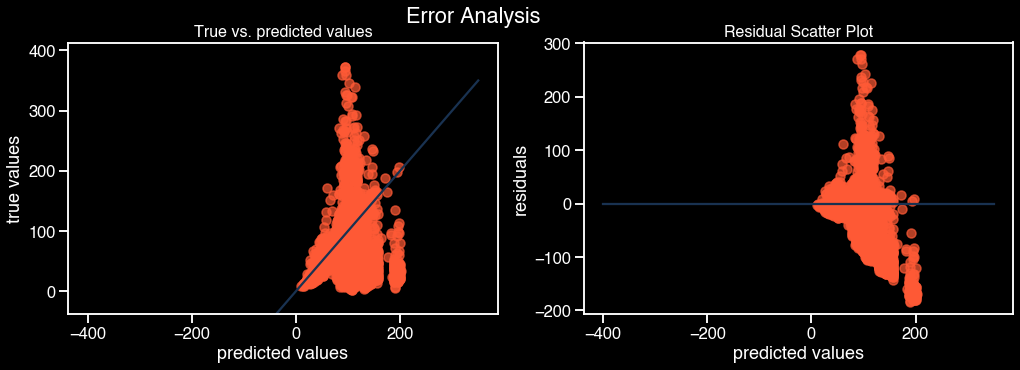

In [136]:
error_analysis(y_test, y_pred_test)

ValueError: x and y must be the same size

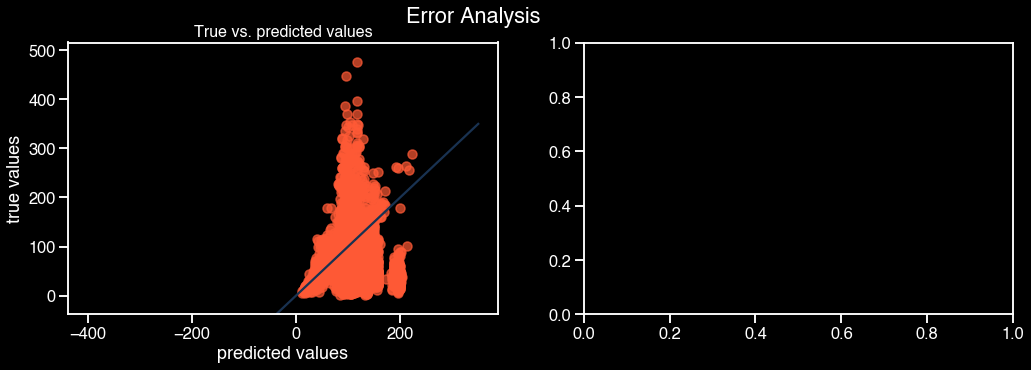

In [137]:
error_analysis(y_train,y_pred_train)

In [138]:
model.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(criterion='poisson', n_jobs=-1, random_state=42,
                      verbose=10)>

In [19]:
from sklearn.model_selection import GridSearchCV

In [158]:
# Defining parameter grid (as dictionary)
# Create the parameters list you wish to tune
parameters = {#'n_estimators':np.arange(155, 175, 1),                               
              #'min_samples_leaf' : np.arange(1, 40, 5),               
              'max_depth' : np.arange(15, 25, 1),
              #"max_features":["auto", "sqrt", "log2"],
             #'criterion': ["squared_error", "absolute_error", "poisson"]    
             } 

             #estimators = 163, min_samples_leaf= 10, max_depth = 17, max_features = "auto"


In [159]:
# Instantiate gridsearch and define the metric to optimize 
gs = GridSearchCV(RandomForestRegressor(random_state=RSEED ,n_estimators=172 ,max_features = "auto" , max_depth=24,min_samples_leaf=30 , criterion="squared_error"), parameters, scoring='neg_root_mean_squared_error',
                  cv=5, verbose=5, n_jobs=-1)

In [160]:
gs.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 4/5] END ....................max_depth=15;, score=-34.314 total time=  34.5s
[CV 2/5] END ....................max_depth=15;, score=-34.188 total time=  34.7s
[CV 5/5] END ....................max_depth=15;, score=-35.797 total time=  34.6s
[CV 2/5] END ....................max_depth=16;, score=-34.183 total time=  34.7s
[CV 1/5] END ....................max_depth=15;, score=-33.885 total time=  34.8s
[CV 3/5] END ....................max_depth=15;, score=-35.302 total time=  34.9s
[CV 1/5] END ....................max_depth=16;, score=-33.880 total time=  34.9s
[CV 3/5] END ....................max_depth=16;, score=-35.297 total time=  35.0s
[CV 4/5] END ....................max_depth=16;, score=-34.311 total time=  36.4s
[CV 5/5] END ....................max_depth=16;, score=-35.793 total time=  36.6s
[CV 2/5] END ....................max_depth=17;, score=-34.182 total time=  36.6s
[CV 4/5] END ....................max_depth=17;, 

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(min_samples_leaf=30,
                                             n_estimators=172,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24])},
             scoring='neg_root_mean_squared_error', verbose=5)

In [161]:
# Best score
print('Best score:', round(gs.best_score_, 3))

# Best parameters
print('Best parameters:', gs.best_params_)

Best score: -34.691
Best parameters: {'max_depth': 24}


In [163]:
# Assigning the fitted SGDClassifier model with best parameter combination to a new variable 
rf_best = gs.best_estimator_

In [164]:
y_pred_train = rf_best.predict(X_train)
y_pred_test = rf_best.predict(X_test)

In [165]:
rf_best

RandomForestRegressor(max_depth=24, min_samples_leaf=30, n_estimators=172,
                      random_state=42)

## Optimiertes Model 

In [162]:
RFR_opt = RandomForestRegressor(random_state=RSEED ,n_estimators=172 ,max_features = "auto" , max_depth=24,min_samples_leaf=30 , criterion="squared_error", n_jobs=-1, verbose=5)

In [166]:
RFR_opt.fit(X_train, y_train)

y_pred_train = RFR_opt.predict(X_train)
y_pred_test = RFR_opt.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 172building tree 2 of 172

building tree 3 of 172
building tree 4 of 172
building tree 5 of 172
building tree 6 of 172
building tree 7 of 172
building tree 8 of 172
building tree 9 of 172
building tree 10 of 172
building tree 11 of 172
building tree 12 of 172
building tree 13 of 172
building tree 14 of 172
building tree 15 of 172
building tree 16 of 172


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s


building tree 17 of 172
building tree 18 of 172
building tree 19 of 172
building tree 20 of 172
building tree 21 of 172
building tree 22 of 172
building tree 23 of 172
building tree 24 of 172
building tree 25 of 172
building tree 26 of 172
building tree 27 of 172
building tree 28 of 172
building tree 29 of 172
building tree 30 of 172
building tree 31 of 172
building tree 32 of 172
building tree 33 of 172
building tree 34 of 172
building tree 35 of 172
building tree 36 of 172
building tree 37 of 172
building tree 38 of 172
building tree 39 of 172
building tree 40 of 172
building tree 41 of 172
building tree 42 of 172
building tree 43 of 172
building tree 44 of 172
building tree 45 of 172
building tree 46 of 172
building tree 47 of 172
building tree 48 of 172
building tree 49 of 172
building tree 50 of 172
building tree 51 of 172
building tree 52 of 172
building tree 53 of 172
building tree 54 of 172
building tree 55 of 172
building tree 56 of 172
building tree 57 of 172
building tree 58

[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.7s


building tree 68 of 172
building tree 69 of 172
building tree 70 of 172
building tree 71 of 172
building tree 72 of 172
building tree 73 of 172
building tree 74 of 172
building tree 75 of 172
building tree 76 of 172
building tree 77 of 172
building tree 78 of 172
building tree 79 of 172
building tree 80 of 172
building tree 81 of 172
building tree 82 of 172building tree 83 of 172

building tree 84 of 172
building tree 85 of 172
building tree 86 of 172
building tree 87 of 172
building tree 88 of 172
building tree 89 of 172
building tree 90 of 172
building tree 91 of 172
building tree 92 of 172
building tree 93 of 172
building tree 94 of 172
building tree 95 of 172
building tree 96 of 172
building tree 97 of 172
building tree 98 of 172
building tree 99 of 172
building tree 100 of 172
building tree 101 of 172
building tree 102 of 172
building tree 103 of 172
building tree 104 of 172
building tree 105 of 172
building tree 106 of 172building tree 107 of 172

building tree 108 of 172
buildin

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.5s


building tree 161 of 172
building tree 162 of 172
building tree 163 of 172
building tree 164 of 172
building tree 165 of 172
building tree 166 of 172
building tree 167 of 172
building tree 168 of 172
building tree 169 of 172
building tree 170 of 172
building tree 171 of 172
building tree 172 of 172


[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    5.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 172 out of 172 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 172 out of 172 | elapsed:    0.0s finished


In [167]:
rmse_train = rmse(y_train, y_pred_train)
rmse_test= rmse(y_test, y_pred_test)

In [168]:
display(rmse_train, rmse_test)

31.577530864107967

34.446754869525094

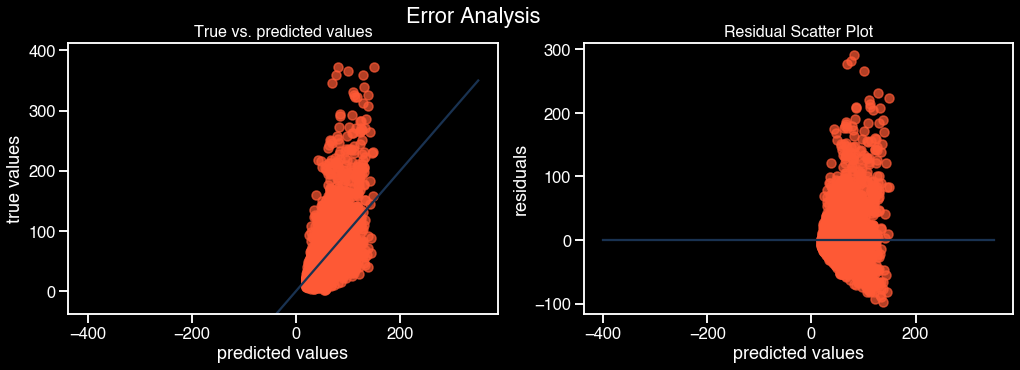

In [169]:
error_analysis(y_test, y_pred_test)

## Location D

In [10]:
data_d = pd.read_csv("./data/data_prep_reg_d.csv", index_col=[0])

In [11]:
data_d

,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,max_precip,...,var_wind_spd,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press
1,3,79.131702,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,0.561,...,0.290736,0.744167,2.760833,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333
10,3,55.638261,34.041667,17.191667,23.189507,4.432786,19.649595,22.033333,16.850000,10.302,...,0.533776,0.840833,3.285000,90.986667,90.211667,90.624814,0.179998,0.032399,90.641667,0.775000
13,3,32.240851,29.608333,19.166667,23.151446,2.808773,7.889204,22.291667,10.441667,2.229,...,0.195908,0.627500,1.705000,90.744167,90.102500,90.454477,0.149374,0.022312,90.471667,0.641667
15,3,72.717021,29.133333,17.516667,22.341529,3.161073,9.992384,21.683333,11.616667,13.588,...,0.124645,0.625000,1.608333,90.873333,90.284167,90.607307,0.139059,0.019337,90.620833,0.589167
22,3,35.833571,30.558333,16.983333,22.401240,3.592899,12.908921,21.333333,13.575000,43.080,...,0.186272,0.678333,2.197500,91.004167,90.217500,90.600544,0.172882,0.029888,90.600833,0.786667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15529,3,72.446739,32.533333,17.758333,24.051928,4.023836,16.191253,23.466667,14.775000,13.769,...,0.463855,0.645417,3.691667,90.808333,90.039167,90.450585,0.179468,0.032209,90.467500,0.769167
15530,3,40.978298,28.633333,17.341667,21.456752,3.259868,10.626741,20.216667,11.291667,18.300,...,0.407898,0.740833,3.158333,90.797500,90.149167,90.507605,0.143908,0.020710,90.526667,0.648333
15532,3,32.002766,30.683333,17.425000,23.125482,3.748884,14.054135,22.166667,13.258333,4.204,...,0.232164,0.707500,2.388333,90.673333,89.910833,90.331026,0.187706,0.035233,90.369167,0.762500
15536,3,38.972128,34.108333,16.950000,24.637083,4.352597,18.945097,24.179167,17.158333,3.893,...,0.389128,0.897500,3.608333,90.885000,90.145833,90.522397,0.161257,0.026004,90.520000,0.739167


In [13]:
y = data_d["target"]
X=np.array(data_d.drop(["target"], axis= 1),ndmin=2)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                         y,
                                         test_size = 0.3, 
                                         random_state = RSEED)

In [15]:
y_train =y_train.values.reshape(-1,1)

In [26]:
# Defining parameter grid (as dictionary)
# Create the parameters list you wish to tune
parameters = {#'n_estimators':np.arange(155, 175, 1),                               
              #'min_samples_leaf' : np.arange(15, 40, 5),               
              #'max_depth' : np.arange(5, 25, 1),
              #"max_features":["auto", "sqrt", "log2"],
             #'criterion': ["squared_error", "absolute_error", "poisson"]    
             } 

             #estimators = 163, min_samples_leaf= 10, max_depth = 17, max_features = "auto"


In [27]:
# Instantiate gridsearch and define the metric to optimize 
gs = GridSearchCV(RandomForestRegressor(random_state=RSEED ,n_estimators=163 , max_depth =20, criterion="squared_error"), parameters, scoring='neg_root_mean_squared_error',
                  cv=5, verbose=5, n_jobs=-1)

In [28]:
gs.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 3/5] END .....................max_depth=5;, score=-23.167 total time=   5.7s
[CV 1/5] END .....................max_depth=5;, score=-27.156 total time=   5.7s
[CV 4/5] END .....................max_depth=5;, score=-22.658 total time=   5.7s
[CV 2/5] END .....................max_depth=5;, score=-25.711 total time=   5.7s
[CV 5/5] END .....................max_depth=5;, score=-23.305 total time=   5.8s
[CV 1/5] END .....................max_depth=6;, score=-26.704 total time=   6.5s
[CV 3/5] END .....................max_depth=6;, score=-22.564 total time=   6.5s
[CV 2/5] END .....................max_depth=6;, score=-25.081 total time=   6.5s
[CV 4/5] END .....................max_depth=6;, score=-22.076 total time=   6.4s
[CV 5/5] END .....................max_depth=6;, score=-22.532 total time=   6.5s
[CV 1/5] END .....................max_depth=7;, score=-26.335 total time=   7.2s
[CV 2/5] END .....................max_depth=7;,

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(min_samples_leaf=15,
                                             n_estimators=163,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24])},
             scoring='neg_root_mean_squared_error', verbose=5)

In [29]:
# Best score
print('Best score:', round(gs.best_score_, 3))

# Best parameters
print('Best parameters:', gs.best_params_)

Best score: -22.778
Best parameters: {'max_depth': 20}


In [30]:
rcf_d_opt = RandomForestRegressor(random_state=RSEED ,n_estimators=163 , max_depth =20, criterion="squared_error",verbose=5)

In [32]:
rcf_d_opt.fit(X_train, y_train.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 163
building tree 2 of 163
building tree 3 of 163
building tree 4 of 163


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


building tree 5 of 163
building tree 6 of 163
building tree 7 of 163
building tree 8 of 163
building tree 9 of 163
building tree 10 of 163
building tree 11 of 163
building tree 12 of 163
building tree 13 of 163
building tree 14 of 163
building tree 15 of 163
building tree 16 of 163
building tree 17 of 163
building tree 18 of 163
building tree 19 of 163
building tree 20 of 163
building tree 21 of 163
building tree 22 of 163
building tree 23 of 163
building tree 24 of 163
building tree 25 of 163
building tree 26 of 163
building tree 27 of 163
building tree 28 of 163
building tree 29 of 163
building tree 30 of 163
building tree 31 of 163
building tree 32 of 163
building tree 33 of 163
building tree 34 of 163
building tree 35 of 163
building tree 36 of 163
building tree 37 of 163
building tree 38 of 163
building tree 39 of 163
building tree 40 of 163
building tree 41 of 163
building tree 42 of 163
building tree 43 of 163
building tree 44 of 163
building tree 45 of 163
building tree 46 of 1

[Parallel(n_jobs=1)]: Done 163 out of 163 | elapsed:   10.4s finished


RandomForestRegressor(max_depth=20, n_estimators=163, random_state=42,
                      verbose=5)

In [36]:
y_pred_train = rcf_d_opt.predict(X_train)
y_pred_test = rcf_d_opt.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 163 out of 163 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 163 out of 163 | elapsed:    0.1s finished


In [37]:
rmse_train = rmse(y_train, y_pred_train)
rmse_test= rmse(y_test, y_pred_test)

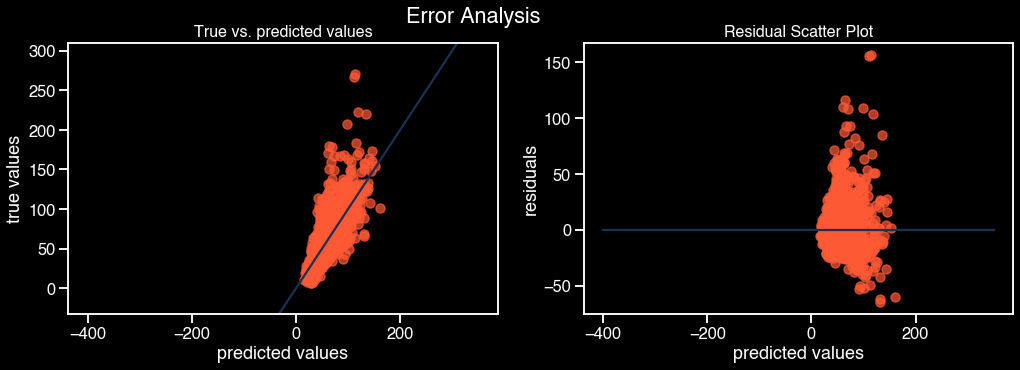

In [38]:
error_analysis(y_test, y_pred_test)